# Example notebook to develop PhenoSim library

In [28]:
import os
import json
import random

import matplotlib.pylab as plt
import numpy as np

try:
    from phenosim import PatientEmulator
    from phenosim.phrank import PhrankSim
except ImportError as error:
    print(error.__class__.__name__ + ": " + error.message)
    val = ''
    while not(val == "y" or val == "n"):
        answer = input('Would you like to install PhenoSim? [y/n]').lower().strip()[0]
    if val == 'y':
        import sys
        !{sys.executable} -m pip install -i https://test.pypi.org/simple/ --extra-index-url=https://pypi.org/simple/ phenosim

In [29]:
OW2 = True
OW3 = True
PHRANK = True

random.seed(1234)

In [41]:
'''
    Helpers
'''
# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def plot_list(x, cumulative=True, normalized=True):
    bins = [1, 2, 3, 4, 5, 10, 25, 50, 100]
    plt.hist(x, bins, density=normalized, histtype='step',
            cumulative=cumulative, label='Empirical')
    
def plot_points(d, cumulative=True):
    lists = sorted(d.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    if cumulative:
        y = np.cumsum(y)
    plt.plot(x, y)

In [42]:
'''
    Emulate patients
'''
emu = PatientEmulator(ancestor_prob=0.5, noise_prob=0.25)

# Configuration
N_pats = 5

# Get HPOs
hpos = list()
for hp in ['HP:0002133']:  # Status epilepticus
    hpos.append(hp)
    hpos.append(emu.hpo.successors(hp, -1))

# Get conditions
conds = emu.phens.diseases_by_phens(hpos)

# Simulate N patients
simulations = emu.generate_patients(conds, N_pats)

sim_set = list(simulations)

N_diseases = len(sim_set)
N_cases = N_pats*N_diseases

print("Simulating {} for each of the {} diseases. Total: {}".format(N_pats, N_diseases, N_cases))

Simulating 5 for each of the 75 diseases. Total: 375


In [32]:
'''
    Predict OWLSim2
'''
from phenosim.owlsim2 import OWLSim2

biolink_phenodigm_list = list()

sim = OWLSim2()
for i,disease in enumerate(sim_set):
    for j,pat in enumerate(simulations[disease]['sims']):
        rank = sim.score(disease, pat, 100)
        biolink_phenodigm_list.append(rank)
        printProgressBar (j+i*N_pats, N_cases)

KeyboardInterrupt: 

NameError: name 'ow2_list' is not defined

In [38]:
'''
    Predict OWLSim3
'''
from phenosim.owlsim3 import OWLSim3

local_phenodigm_list = list()

sim = OWLSim3(algorithm='phenodigm')
for i,disease in enumerate(sim_set):
    for j,pat in enumerate(simulations[disease]['sims']):
        rank = sim.score(disease, pat, 100)
        local_phenodigm_list.append(rank)
        printProgressBar(j+i*N_pats, N_cases)

Wall time: 6min 56s██████████████████████████████████████████████████████████████████████████████████-| 99.7% 


In [40]:
# if OW3:
#     plot(ow3)
#     plt.show()
plot_list(local_phenodigm_list)
plt.show()

NameError: name 'local_phenodigm_list' is not defined

In [43]:
'''
    Predict Phrank
'''
from phenosim.phrank import PhrankSim

phrank_list = list()

sim = PhrankSim()
for i,disease in enumerate(sim_set):
    for j,pat in enumerate(simulations[disease]['sims']):
        rank = sim.score(disease, pat, 100)
        phrank_list.append(rank)
        printProgressBar(j+i*N_pats, N_cases)

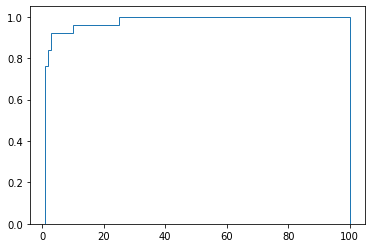

In [44]:
if PHRANK:
    plot_list(phrank_list)
    plt.show()

In [ ]:
if OW2: plot_list(ow2)
if OW3: plot_list(ow3)
if PHRANK: plot_list(phk)
plt.show()
